# **Install Dependencies Detecron2 & Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 🗂 Buat direktori target
!mkdir -p "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new"

# ⬇️ Unduh file zip dari Roboflow ke direktori target
!curl -L "https://app.roboflow.com/ds/g32luldSN8?key=kVAIz6q98E" -o "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/roboflow.zip"

# 📦 Ekstrak isi zip ke folder yang sama
!unzip -q "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/roboflow.zip" -d "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new"

# 🧹 Hapus file zip setelah diekstrak
!rm "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/roboflow.zip"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   893  100   893    0     0   2749      0 --:--:-- --:--:-- --:--:--  2756
100 26.6M  100 26.6M    0     0  20.8M      0  0:00:01  0:00:01 --:--:-- 29.9M


In [2]:
# 📦 Install dependencies
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install -q pycocotools

# 🔧 Setup: Import & Register Dataset
import os
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import random
import cv2
from matplotlib import pyplot as plt

# Adjust these if your paths differ after unzip
# dataset_name = "roboflow"
# img_dir = "train"
# train_json = "train/_annotations.coco.json"
# val_json = "valid/_annotations.coco.json"

# register_coco_instances("roboflow_train", {}, train_json, img_dir)
# register_coco_instances("roboflow_val", {}, val_json, "valid")



  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-t1izz3st
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-t1izz3st
  Resolved https://github.com/facebookresearch/detectron2.git to commit b15f64ec4429e23a148972175a0207c5a9ab84cf
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.7 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311-cp311-linux_x86_64.whl size=6434762 sha256=f7cbc35601dc2f7206044b3cd4bba8a09a13d95fda1d85c70565a376b7d7815d
  Stored in directory: /tmp/pip-ephem-wheel-cache-uaipjfiq/wheels/17/d9/40/60db98e485aa9455d

# **Register Dataset**

In [3]:
# Set root folder di Google Drive
dataset_root = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new"

# Buat path lengkap ke JSON dan folder gambar
train_json = os.path.join(dataset_root, "train/_annotations.coco.json")
val_json = os.path.join(dataset_root, "valid/_annotations.coco.json")
test_json = os.path.join(dataset_root, "test/_annotations.coco.json")
train_img_dir = os.path.join(dataset_root, "train")
val_img_dir = os.path.join(dataset_root, "valid")
test_img_dir = os.path.join(dataset_root, "test")

# ✅ Cek apakah file dan folder ada
print("Train JSON exists:", os.path.exists(train_json))
print("Train Image Dir exists:", os.path.exists(train_img_dir))

# 🗂 Daftarkan dataset ke Detectron2
register_coco_instances("roboflow_train", {}, train_json, train_img_dir)
register_coco_instances("roboflow_val", {}, val_json, val_img_dir)
register_coco_instances("roboflow_test", {}, test_json, test_img_dir)

Train JSON exists: True
Train Image Dir exists: True


In [ ]:
# Cek sample data target
dataset_dicts = DatasetCatalog.get("roboflow_train")
print(dataset_dicts[0])  # satu contoh anotasi

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/train/f10143e3eb341eac01909c339a5cf01f_jpg.rf.e1f6a97b831747323d0db7c575d520cd.jpg', 'height': 512, 'width': 512, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [212, 308, 221, 102], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


In [ ]:
for i, data in enumerate(dataset_dicts):
    print(f"\n===== Data {i} =====")
    print(data)


===== Data 0 =====
{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/train/f10143e3eb341eac01909c339a5cf01f_jpg.rf.e1f6a97b831747323d0db7c575d520cd.jpg', 'height': 512, 'width': 512, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [212, 308, 221, 102], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

===== Data 1 =====
{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/train/00007471_003_jpg.rf.cf663d23a4e19ae10b50ffae7b5c27e5.jpg', 'height': 512, 'width': 512, 'image_id': 1, 'annotations': [{'iscrowd': 0, 'bbox': [270, 53, 167, 241], 'category_id': 3, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

===== Data 2 =====
{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/train/00027652_003_jpg.rf.badfde1bc3fc66cb2b41b630d3f82ec1.jpg', 'height': 512, 'width': 512, 'image_id': 2, 'annotations': [{'iscrowd': 0, 'bbox': [38, 101, 73, 258], 'category_

In [ ]:
import json

# Path ke file JSON kamu
json_path = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/_annotations_fixed.coco.json"

# Buka dan baca file JSON
with open(json_path, 'r') as f:
    data = json.load(f)

# Tampilkan isi kategori
print("== Kategori dalam file COCO JSON ==")
for cat in data['categories']:
    print(f"  ID: {cat['id']}  |  Name: {cat['name']}")


== Kategori dalam file COCO JSON ==
  ID: 0  |  Name: Cardiomegaly
  ID: 1  |  Name: Nodule-Mass
  ID: 2  |  Name: Pneumothorax


In [ ]:
# Cek sample data target
dataset_dicts_1 = DatasetCatalog.get("roboflow_val")
print(dataset_dicts_1[0])  # satu contoh anotasi

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/valid/2534b21e1fcdf7748a07109999952840_jpg.rf.99a9a8605e3b7d31efbf0d50c4254f12.jpg', 'height': 512, 'width': 512, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [402, 352, 14, 14], 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


In [ ]:
for i, data in enumerate(dataset_dicts_1):
    print(f"\n===== Data {i} =====")
    print(data)


===== Data 0 =====
{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/valid/2534b21e1fcdf7748a07109999952840_jpg.rf.99a9a8605e3b7d31efbf0d50c4254f12.jpg', 'height': 512, 'width': 512, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [402, 352, 14, 14], 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

===== Data 1 =====
{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/valid/33db2b371f7527ae2cd349abe5a7c062_jpg.rf.075945d7b24cae15cebcb72535a2369e.jpg', 'height': 512, 'width': 512, 'image_id': 1, 'annotations': [{'iscrowd': 0, 'bbox': [121, 239, 214, 56], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

===== Data 2 =====
{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/valid/1d2c0ac10d4b141cda8b549c34848b4f_jpg.rf.7c835ee3fb72c924723802528f594fa3.jpg', 'height': 512, 'width': 512, 'image_id': 2, 'annotations': [{'iscrowd': 0, 

In [ ]:
# Cek sample data target
dataset_dicts_2 = DatasetCatalog.get("roboflow_test")
print(dataset_dicts_2[0])  # satu contoh anotasi

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/test/00005140_001_jpg.rf.93ee438d7dea6cdf83b5417a0c663090.jpg', 'height': 512, 'width': 512, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [63, 131, 70, 223], 'category_id': 3, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


In [ ]:
for i, data in enumerate(dataset_dicts_2):
    print(f"\n===== Data {i} =====")
    print(data)


===== Data 0 =====
{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/test/00005140_001_jpg.rf.93ee438d7dea6cdf83b5417a0c663090.jpg', 'height': 512, 'width': 512, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [63, 131, 70, 223], 'category_id': 3, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

===== Data 1 =====
{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/test/e67e91b27935a01b738eaa01ede863fd_jpg.rf.7aa69efa3b1da209bc16e869b4495b14.jpg', 'height': 512, 'width': 512, 'image_id': 1, 'annotations': [{'iscrowd': 0, 'bbox': [108, 142, 70, 18], 'category_id': 3, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

===== Data 2 =====
{'file_name': '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/test/959e5d96df8e3eaa7eed10f8b0b3d08c_jpg.rf.23341869bc91655ed1933f58fb4fd61b.jpg', 'height': 512, 'width': 512, 'image_id': 2, 'annotations': [{'iscrowd': 0, 'bbox': [126, 357, 35, 2

# **Konfigurasi Model**

**Penghitungan Epoch = jumlah data train//batch_size = 892//16 = 56**

In [3]:
from detectron2 import model_zoo

# 🧠 Configure RetinaNet
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("roboflow_train",)
cfg.DATASETS.TEST = ("roboflow_val",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = "detectron2://ImageNetPretrained/MSRA/R-50.pkl"
cfg.SOLVER.IMS_PER_BATCH = 16
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 1680
cfg.TEST.EVAL_PERIOD = 500  # Evaluate every 500 iterations
cfg.SOLVER.STEPS = []
cfg.MODEL.RETINANET.NUM_CLASSES = 4
cfg.OUTPUT_DIR = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# 📦 Tambahan: Tampilkan konfigurasi anchor
print("📐 Anchor Sizes per FPN level (cfg.MODEL.ANCHOR_GENERATOR.SIZES):")
for i, sizes in enumerate(cfg.MODEL.ANCHOR_GENERATOR.SIZES):
    print(f"  Level P{i+3}: Scales = {sizes}")

print("\n🔢 Aspect Ratios (cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS):")
print(f"  {cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS}")

# 🔁 Hitung jumlah anchor per lokasi
num_scales = len(cfg.MODEL.ANCHOR_GENERATOR.SIZES[0])  # asumsi semua level punya scale yang sama
num_ratios = len(cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS[0])
num_anchors_per_location = num_scales * num_ratios
print(f"\n📦 Jumlah anchor per lokasi (k): {num_anchors_per_location}")

📐 Anchor Sizes per FPN level (cfg.MODEL.ANCHOR_GENERATOR.SIZES):
  Level P3: Scales = [32, 40.31747359663594, 50.79683366298238]
  Level P4: Scales = [64, 80.63494719327188, 101.59366732596476]
  Level P5: Scales = [128, 161.26989438654377, 203.18733465192952]
  Level P6: Scales = [256, 322.53978877308754, 406.37466930385904]
  Level P7: Scales = [512, 645.0795775461751, 812.7493386077181]

🔢 Aspect Ratios (cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS):
  [[0.5, 1.0, 2.0]]

📦 Jumlah anchor per lokasi (k): 9


# **Data Target**

**Percobaan Dummy**

In [ ]:
import torch
from detectron2.config import get_cfg
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2 import model_zoo

# === 1. Setup config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_1x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_1x.yaml")
cfg.MODEL.RETINANET.NUM_CLASSES = 3
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# === 2. Build model
model = build_model(cfg)
model.eval()
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# === 3. Dummy input image
dummy_input = torch.randn(1, 3, 512, 512).to(cfg.MODEL.DEVICE)

# === 4. Dapatkan fitur dan output head
with torch.no_grad():
    features = model.backbone(dummy_input)
    feature_list = [features[f'p{l}'] for l in range(3, 8)]
    head_outputs = model.head(feature_list)

# === 5. Hitung anchor box per level
anchor_shapes = {}
classification_shapes = {}
regression_shapes = {}

# Perbaikan penting di sini
num_scales = len(cfg.MODEL.ANCHOR_GENERATOR.SIZES[0])        # biasanya 3
num_ratios = len(cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS[0])  # biasanya 3
num_anchors_per_location = num_scales * num_ratios            # = 9

num_classes = cfg.MODEL.RETINANET.NUM_CLASSES

for fpn_level in range(3, 8):
    feature = features[f'p{fpn_level}']
    N, _, H, W = feature.shape

    cls_shape = (N, num_anchors_per_location * num_classes, H, W)
    reg_shape = (N, num_anchors_per_location * 4, H, W)

    classification_shapes[f'p{fpn_level}'] = cls_shape
    regression_shapes[f'p{fpn_level}'] = reg_shape

    total_anchors = H * W * num_anchors_per_location
    anchor_shapes[f'p{fpn_level}'] = total_anchors

# === 6. Print hasil
total_anchor_count = sum(anchor_shapes.values())

print("Jumlah Anchor per FPN level:")
for level, count in anchor_shapes.items():
    print(f"{level}: {count} anchor")

print("\nOutput Shape Klasifikasi:")
for level, shape in classification_shapes.items():
    print(f"{level}: {shape}")

print("\nOutput Shape Regresi:")
for level, shape in regression_shapes.items():
    print(f"{level}: {shape}")

print(f"\nTotal Anchor: {total_anchor_count}")
print(f"Klasifikasi: ({total_anchor_count}, {cfg.MODEL.RETINANET.NUM_CLASSES})")
print(f"Regresi: ({total_anchor_count}, 4)")


head.cls_score.{bias, weight}
  pixel_mean
  pixel_std


Jumlah Anchor per FPN level:
p3: 36864 anchor
p4: 9216 anchor
p5: 2304 anchor
p6: 576 anchor
p7: 144 anchor

Output Shape Klasifikasi:
p3: (1, 27, 64, 64)
p4: (1, 27, 32, 32)
p5: (1, 27, 16, 16)
p6: (1, 27, 8, 8)
p7: (1, 27, 4, 4)

Output Shape Regresi:
p3: (1, 36, 64, 64)
p4: (1, 36, 32, 32)
p5: (1, 36, 16, 16)
p6: (1, 36, 8, 8)
p7: (1, 36, 4, 4)

Total Anchor: 49104
Klasifikasi: (49104, 3)
Regresi: (49104, 4)


**Pada Data Train**

In [9]:
# === 1. Import library ===
import torch
import os
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.modeling import build_model
from detectron2.data import DatasetCatalog, detection_utils as utils
from detectron2.data.datasets import register_coco_instances

# === 2. Path dataset ===
annotation_path = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/train/_annotations.coco.json"
image_dir = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/train"

if not os.path.exists(annotation_path):
    raise FileNotFoundError(f"File anotasi tidak ditemukan: {annotation_path}")
if not os.path.exists(image_dir):
    raise FileNotFoundError(f"Folder gambar tidak ditemukan: {image_dir}")

# === 3. Registrasi dataset COCO ===
register_coco_instances("my_train_2", {}, annotation_path, image_dir)

# === 4. Konfigurasi model Detectron2 ===
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_1x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_1x.yaml")
cfg.MODEL.RETINANET.NUM_CLASSES = 3
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
cfg.DATASETS.TRAIN = ("my_train_2",)
cfg.DATASETS.TEST = ("my_train_2",)

# Atur resolusi input tetap
cfg.INPUT.MIN_SIZE_TEST = 512
cfg.INPUT.MAX_SIZE_TEST = 512
cfg.INPUT.MIN_SIZE_TRAIN = 512
cfg.INPUT.MAX_SIZE_TRAIN = 512
cfg.INPUT.MIN_SIZE_TRAIN_SAMPLING = "choice"

# === 5. Bangun model dan load bobot ===
model = build_model(cfg)
model.eval()
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# === 6. Ambil data dari dataset berdasarkan nama file ===
dataset_dicts = DatasetCatalog.get("my_train_2")

# === Ganti nama file sesuai yang kamu inginkan ===
target_filename = "00000732_005_jpg.rf.331df048715d39346021fe3e09b95fdc.jpg"  # <-- Ganti ini sesuai nama file yang kamu cari

data_dict = None
for d in dataset_dicts:
    if os.path.basename(d["file_name"]) == target_filename:
        data_dict = d
        break

if data_dict is None:
    raise FileNotFoundError(f"Gambar dengan nama '{target_filename}' tidak ditemukan dalam dataset.")

# === 7. Baca dan ubah gambar jadi input model ===
# Baca gambar & konversi ke tensor dengan copy() untuk hindari stride negatif
image = utils.read_image(data_dict["file_name"], format="BGR")
image_tensor = torch.tensor(image.transpose(2, 0, 1).copy()).float().div(255.0).unsqueeze(0).to(cfg.MODEL.DEVICE)

# === 8. Proses backbone dan head model ===
with torch.no_grad():
    features = model.backbone(image_tensor)
    feature_list = [features[f'p{l}'] for l in range(3, 8)]
    head_outputs = model.head(feature_list)

# === 9. Hitung anchor dan bentuk output ===
anchor_shapes = {}
classification_shapes = {}
regression_shapes = {}

num_scales = len(cfg.MODEL.ANCHOR_GENERATOR.SIZES[0])        # default: 3
num_ratios = len(cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS[0])  # default: 3
num_anchors_per_location = num_scales * num_ratios            # 9
num_classes = cfg.MODEL.RETINANET.NUM_CLASSES

for fpn_level in range(3, 8):
    feature = features[f'p{fpn_level}']
    N, _, H, W = feature.shape

    cls_shape = (N, num_anchors_per_location * num_classes, H, W)
    reg_shape = (N, num_anchors_per_location * 4, H, W)

    classification_shapes[f'p{fpn_level}'] = cls_shape
    regression_shapes[f'p{fpn_level}'] = reg_shape

    total_anchors = H * W * num_anchors_per_location
    anchor_shapes[f'p{fpn_level}'] = total_anchors

# === 10. Tampilkan hasil ===
total_anchor_count = sum(anchor_shapes.values())

print("Jumlah Anchor per FPN level:")
for level, count in anchor_shapes.items():
    print(f"{level}: {count} anchor")

print("\nOutput Shape Klasifikasi:")
for level, shape in classification_shapes.items():
    print(f"{level}: {shape}")

print("\nOutput Shape Regresi:")
for level, shape in regression_shapes.items():
    print(f"{level}: {shape}")

print(f"\nTotal Anchor: {total_anchor_count}")
print(f"Klasifikasi: ({total_anchor_count}, {num_classes})")
print(f"Regresi: ({total_anchor_count}, 4)")


model_final_bfca0b.pkl: 152MB [00:07, 20.9MB/s]                           
head.cls_score.{bias, weight}
  pixel_mean
  pixel_std
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Jumlah Anchor per FPN level:
p3: 36864 anchor
p4: 9216 anchor
p5: 2304 anchor
p6: 576 anchor
p7: 144 anchor

Output Shape Klasifikasi:
p3: (1, 27, 64, 64)
p4: (1, 27, 32, 32)
p5: (1, 27, 16, 16)
p6: (1, 27, 8, 8)
p7: (1, 27, 4, 4)

Output Shape Regresi:
p3: (1, 36, 64, 64)
p4: (1, 36, 32, 32)
p5: (1, 36, 16, 16)
p6: (1, 36, 8, 8)
p7: (1, 36, 4, 4)

Total Anchor: 49104
Klasifikasi: (49104, 3)
Regresi: (49104, 4)


In [5]:
# === 1. Import library ===
import torch
import os
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.modeling import build_model
from detectron2.data import DatasetCatalog, detection_utils as utils
from detectron2.data.datasets import register_coco_instances
from detectron2.modeling.matcher import Matcher
from detectron2.modeling.anchor_generator import DefaultAnchorGenerator
from detectron2.structures import Boxes
from detectron2.modeling.box_regression import Box2BoxTransform
from detectron2.structures.boxes import pairwise_iou
import numpy as np
from detectron2.layers import ShapeSpec

# === 2. Path dataset ===
annotation_path = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/train/_annotations.coco.json"
image_dir = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/train"

if not os.path.exists(annotation_path):
    raise FileNotFoundError(f"File anotasi tidak ditemukan: {annotation_path}")
if not os.path.exists(image_dir):
    raise FileNotFoundError(f"Folder gambar tidak ditemukan: {image_dir}")

# === 3. Registrasi dataset COCO ===
register_coco_instances("my_train_2", {}, annotation_path, image_dir)

# === 4. Konfigurasi model Detectron2 ===
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_3x.yaml"))

# ✅ Perbaikan Anchor Generator
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [
    [32, 40.31747359663594, 50.79683366298238],
    [64, 80.63494719327188, 101.59366732596476],
    [128, 161.26989438654377, 203.18733465192952],
    [256, 322.53978877308754, 406.37466930385904],
    [512, 645.0795775461751, 812.7493386077181]
]
cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.5, 1.0, 2.0]]

cfg.MODEL.WEIGHTS = "detectron2://ImageNetPretrained/MSRA/R-50.pkl"
cfg.MODEL.RETINANET.NUM_CLASSES = 3
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
cfg.DATASETS.TRAIN = ("my_train_2",)
cfg.DATASETS.TEST = ("my_train_2",)

cfg.INPUT.MIN_SIZE_TEST = 512
cfg.INPUT.MAX_SIZE_TEST = 512
cfg.INPUT.MIN_SIZE_TRAIN = 512
cfg.INPUT.MAX_SIZE_TRAIN = 512
cfg.INPUT.MIN_SIZE_TRAIN_SAMPLING = "choice"

# === 5. Bangun model dan load bobot ===
model = build_model(cfg)
model.eval()
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# === 6. Ambil data dari dataset berdasarkan nama file ===
dataset_dicts = DatasetCatalog.get("my_train_2")

# === Ganti nama file sesuai yang kamu inginkan ===
target_filename = "01a3c3d994d85ce5634d2d13c03fd4b0_jpg.rf.3e9209e148bae99e32c3050e2e46042b.jpg"

data_dict = None
for d in dataset_dicts:
    if os.path.basename(d["file_name"]) == target_filename:
        data_dict = d
        break

if data_dict is None:
    raise FileNotFoundError(f"Gambar dengan nama '{target_filename}' tidak ditemukan dalam dataset.")

# === 7. Baca dan ubah gambar jadi input model ===
image = utils.read_image(data_dict["file_name"], format="BGR")
image_tensor = torch.tensor(image.transpose(2, 0, 1).copy()).float().div(255.0).unsqueeze(0).to(cfg.MODEL.DEVICE)

# === 8. Proses backbone dan head model ===
with torch.no_grad():
    features = model.backbone(image_tensor)
    feature_list = [features[f'p{l}'] for l in range(3, 8)]
    head_outputs = model.head(feature_list)

# === 9. Hitung anchor dan bentuk output ===
anchor_shapes = {}
classification_shapes = {}
regression_shapes = {}

num_scales = len(cfg.MODEL.ANCHOR_GENERATOR.SIZES[0])        # default: 3
num_ratios = len(cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS[0])  # default: 3
num_anchors_per_location = num_scales * num_ratios            # 9
num_classes = cfg.MODEL.RETINANET.NUM_CLASSES

for fpn_level in range(3, 8):
    feature = features[f'p{fpn_level}']
    N, _, H, W = feature.shape

    cls_shape = (N, num_anchors_per_location * num_classes, H, W)
    reg_shape = (N, num_anchors_per_location * 4, H, W)

    classification_shapes[f'p{fpn_level}'] = cls_shape
    regression_shapes[f'p{fpn_level}'] = reg_shape

    total_anchors = H * W * num_anchors_per_location
    anchor_shapes[f'p{fpn_level}'] = total_anchors

total_anchor_count = sum(anchor_shapes.values())

print("Jumlah Anchor per FPN level:")
for level, count in anchor_shapes.items():
    print(f"{level}: {count} anchor")

print("\nOutput Shape Klasifikasi:")
for level, shape in classification_shapes.items():
    print(f"{level}: {shape}")

print("\nOutput Shape Regresi:")
for level, shape in regression_shapes.items():
    print(f"{level}: {shape}")

print(f"\nTotal Anchor: {total_anchor_count}")
print(f"Klasifikasi: ({total_anchor_count}, {num_classes})")
print(f"Regresi: ({total_anchor_count}, 4)")

# === 10. Anchor generator ===
input_shapes = []
for level in range(3, 8):
    f = features[f'p{level}']
    stride = 2 ** level
    input_shapes.append(ShapeSpec(
        channels=f.shape[1],
        height=f.shape[2],
        width=f.shape[3],
        stride=stride
    ))

anchor_generator = DefaultAnchorGenerator(cfg, input_shapes)

# Siapkan list fitur
feature_list = [features[f'p{l}'] for l in range(3, 8)]

# Generate anchors
anchors_over_all_levels = anchor_generator(feature_list)
all_anchors = torch.cat([a.tensor for a in anchors_over_all_levels], dim=0)
num_anchors = all_anchors.shape[0]

# === 11. Ambil ground truth dari data_dict ===
# Extract gt boxes dan classes
gt_boxes_xywh = [ann["bbox"] for ann in data_dict.get("annotations", [])]
gt_classes_raw = [ann["category_id"] for ann in data_dict.get("annotations", [])]

if len(gt_boxes_xywh) == 0:
    raise ValueError("Ground truth annotation kosong untuk gambar ini.")

# Konversi list ke tensor
gt_boxes = torch.tensor(gt_boxes_xywh, dtype=torch.float32)  # (N, 4)
gt_classes = torch.tensor(gt_classes_raw, dtype=torch.int64)  # (N,)

# COCO biasanya category_id mulai dari 1, deteksi kita 0-based
gt_classes -= 1

# Konversi bbox dari [x, y, w, h] ke [x1, y1, x2, y2]
gt_boxes[:, 2:] += gt_boxes[:, :2]
gt_boxes = Boxes(gt_boxes)

# === 12. Matching anchor dan ground truth ===
box_matcher = Matcher(cfg.MODEL.RETINANET.IOU_THRESHOLDS,
                      cfg.MODEL.RETINANET.IOU_LABELS,
                      allow_low_quality_matches=True)

match_quality_matrix = pairwise_iou(gt_boxes, Boxes(all_anchors))
matched_idxs, matched_labels = box_matcher(match_quality_matrix)

# === 13. Buat target klasifikasi dan regresi ===
target_classes = torch.zeros((num_anchors, num_classes), dtype=torch.float32)
target_deltas = torch.zeros((num_anchors, 4), dtype=torch.float32)

pos_inds = torch.where(matched_labels == 1)[0]
neg_inds = torch.where(matched_labels == 0)[0]

for idx in pos_inds:
    cls = gt_classes[matched_idxs[idx]]
    target_classes[idx, cls] = 1.0

box_transform = Box2BoxTransform(weights=(1.0, 1.0, 1.0, 1.0))
box_transform = Box2BoxTransform(weights=(1.0, 1.0, 1.0, 1.0))
gt_matched_boxes = gt_boxes[matched_idxs[pos_inds]]
target_deltas[pos_inds] = box_transform.get_deltas(all_anchors[pos_inds], gt_matched_boxes.tensor)

# === 14. Cetak hasil ===
print(f"\nJumlah Anchor Positif: {len(pos_inds)}")
print(f"Jumlah Anchor Negatif: {len(neg_inds)}")

print("\nContoh Target Anchor Negatif (klasifikasi dan regresi):")
for i in neg_inds[:3]:
    print(f"[{i.item()}] Klasifikasi: {target_classes[i].numpy()}, Regresi: {target_deltas[i].numpy()}")

print("\nContoh Target Anchor Positif (klasifikasi dan regresi):")
for i in pos_inds[:31]:
    print(f"[{i.item()}] Klasifikasi: {target_classes[i].numpy()}, Regresi (tx, ty, tw, th): {target_deltas[i].numpy()}")


backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
backbone.top_block.p6.{bias, weight}
backbone.top_block.p7.{bias, weight}
head.bbox_pred.{bias, weight}
head.bbox_subnet.0.{bias, weight}
head.bbox_subnet.2.{bias, weight}
head.bbox_subnet.4.{bias, weight}
head.bbox_subnet.6.{bias, weight}
head.cls_score.{bias, weight}
head.cls_subnet.0.{bias, weight}
head.cls_subnet.2.{bias, weight}
head.cls_subnet.4.{bias, weight}
head.cls_subnet.6.{bias, weight}
  fc1000.{bias, weight}
  stem.conv1.bias
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Jumlah Anchor per FPN level:
p3: 36864 anchor
p4: 9216 anchor
p5: 2304 anchor
p6: 576 anchor
p7: 144 anchor

Output Shape Klasifikasi:
p3: (1, 27, 64, 64)
p4: (1, 27, 32, 32)
p5: (1, 27, 16, 16)
p6: (1, 27, 8, 8)
p7: (1, 27, 4, 4)

Output Shape Regresi:
p3: (1, 36, 64, 64)
p4: (1, 36, 32, 32)
p5: (1, 36, 16, 16)
p6: (1, 36, 8, 8)
p7: (1, 36, 4, 4)

Total Anchor: 49104
Klasifikasi: (49104, 3)
Regresi: (49104, 4)

Jumlah Anchor Positif: 31
Jumlah Anchor Negatif: 49002

Contoh Target Anchor Negatif (klasifikasi dan regresi):
[0] Klasifikasi: [0. 0. 0.], Regresi: [0. 0. 0. 0.]
[1] Klasifikasi: [0. 0. 0.], Regresi: [0. 0. 0. 0.]
[2] Klasifikasi: [0. 0. 0.], Regresi: [0. 0. 0. 0.]

Contoh Target Anchor Positif (klasifikasi dan regresi):
[13440] Klasifikasi: [0. 1. 0.], Regresi (tx, ty, tw, th): [ 0.01753847  0.36830786 -0.01800684  0.5416089 ]
[13443] Klasifikasi: [0. 1. 0.], Regresi (tx, ty, tw, th): [ 0.01392029  0.2923261  -0.24905609  0.3105597 ]
[13444] Klasifikasi: [0. 1. 0.], Regresi 

In [ ]:
print(iou.shape)
print(matched_idxs.shape)
print(matched_labels.shape)


torch.Size([49104, 1])
torch.Size([1])
torch.Size([1])


# **Training Skenario 3**

In [ ]:
#trainer = DefaultTrainer(cfg)
#trainer.resume_or_load(resume=False)
#trainer.train()

# 🚀 Train with saving best model
from detectron2.engine.hooks import BestCheckpointer
from detectron2.evaluation import COCOEvaluator
from detectron2.data import build_detection_test_loader

from detectron2.engine import DefaultTrainer
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.utils.events import EventStorage

class MyTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

    def build_hooks(self):
        hooks = super().build_hooks()
        # Save the best checkpoint (based on bbox/AP)
        hooks.insert(
            -1,
            BestCheckpointer(
                cfg.TEST.EVAL_PERIOD,
                checkpointer=DetectionCheckpointer(self.model, cfg.OUTPUT_DIR),
                val_metric="bbox/AP",
                mode="max",
                file_prefix="best_model"
            )
        )
        return hooks

trainer = MyTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/14 04:01:59 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

R-50.pkl: 102MB [00:01, 76.6MB/s]                           


[06/14 04:02:01 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[06/14 04:02:01 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up - Total num: 54


backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
backbone.top_block.p6.{bias, weight}
backbone.top_block.p7.{bias, weight}
head.bbox_pred.{bias, weight}
head.bbox_subnet.0.{bias, weight}
head.bbox_subnet.2.{bias, weight}
head.bbox_subnet.4.{bias, weight}
head.bbox_subnet.6.{bias, weight}
head.cls_score.{bias, weight}
head.cls_subnet.0.{bias, weight}
head.cls_subnet.2.{bias, weight}
head.cls_subnet.4.{bias, weight}
head.cls_subnet.6.{bias, weight}
  fc1000.{bias, weight}
  stem.conv1.bias


[06/14 04:02:01 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/14 04:02:46 d2.utils.events]:  eta: 0:57:16  iter: 19  total_loss: 2.498  loss_cls: 1.556  loss_box_reg: 0.945    time: 2.1125  last_time: 2.1245  data_time: 0.0976  last_data_time: 0.0919   lr: 1.9981e-05  max_mem: 7474M
[06/14 04:03:34 d2.utils.events]:  eta: 0:58:51  iter: 39  total_loss: 1.885  loss_cls: 1.154  loss_box_reg: 0.7169    time: 2.1573  last_time: 2.3263  data_time: 0.0894  last_data_time: 0.0752   lr: 3.9961e-05  max_mem: 7474M
[06/14 04:04:21 d2.utils.events]:  eta: 1:00:21  iter: 59  total_loss: 1.941  loss_cls: 1.148  loss_box_reg: 0.7407    time: 2.2188  last_time: 2.2821  data_time: 0.0909  last_data_time: 0.0932   lr: 5.9941e-05  max_mem: 7474M
[06/14 04:05:07 d2.utils.events]:  eta: 1:00:31  iter: 79  total_loss: 1.838  loss_cls: 1.129  loss_box_reg: 0.7065    time: 2.2341  last_time: 2.3421  data_time: 0.0876  last_data_time: 0.1110   lr: 7.9921e-05  max_mem: 7474M
[06/14 04:05:53 d2.utils.events]:  eta: 1:00:13  iter: 99  total_loss: 1.836  loss_cls: 1.132

# **Simpan Konfigurasi Model**

In [ ]:
with open(os.path.join(cfg.OUTPUT_DIR, "config.yaml"), "w") as f:
    f.write(cfg.dump())

# **Prediksi**

[06/14 05:08:55 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/best_model.pth ...


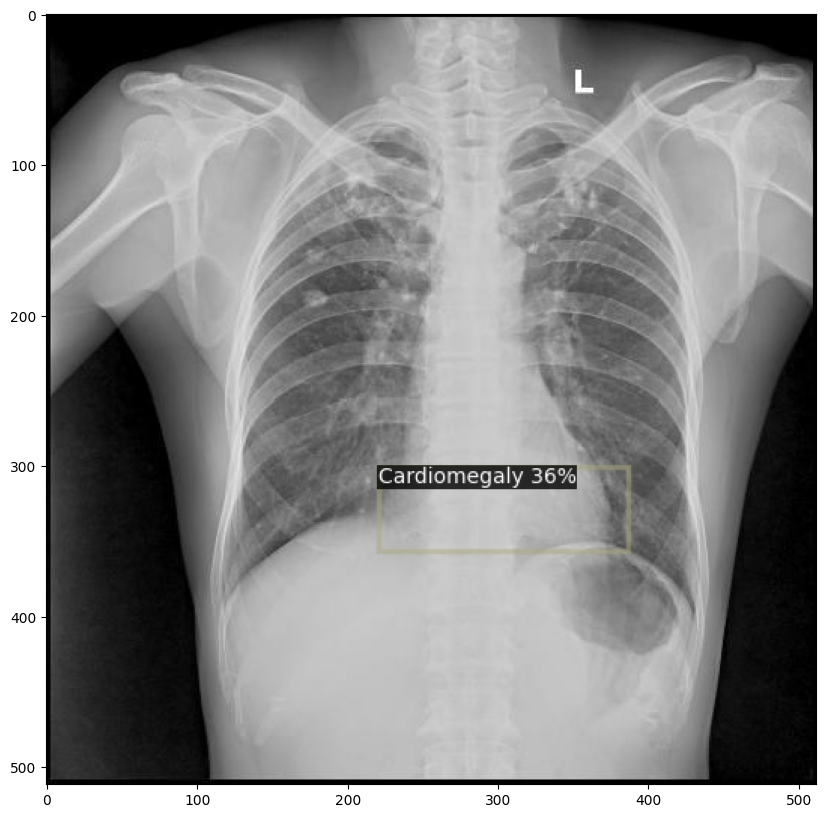

Detected 1 objects with confidence > 30.0%.


In [ ]:
# 🧠 Load the trained model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "best_model.pth")  # Load the weights from your training
#cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold to 50% for detection

from detectron2.engine import DefaultPredictor

predictor = DefaultPredictor(cfg)

# 📸 Read the image
#image_path = '/content/valid/00000732_005_jpg.rf.3541c4c659fec2d5d003b4fb7a380dea.jpg'
image_path = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/test/9e90a23fb8d5ce13eb766d538afcafea_jpg.rf.0781f1855ffb9a79518d927eefc0a0cd.jpg"
im = cv2.imread(image_path)

# 🧠 Run inference
outputs = predictor(im)

# Filter instances with confidence
confidence = 0.3
instances = outputs["instances"]
scores = instances.scores
filtered_instances = instances[scores > confidence]

# 🖼️ Visualize the results
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get("roboflow_train"), scale=1)
v = v.draw_instance_predictions(filtered_instances.to("cpu"))

# Show the image with filtered instances
plt.figure(figsize=(10, 10))
plt.imshow(v.get_image())
plt.show()

# Optionally, print out the number of detections
print(f"Detected {len(filtered_instances)} objects with confidence > {confidence*100}%.")


# **Grafik Record Training**

**Grafik Total Loss**

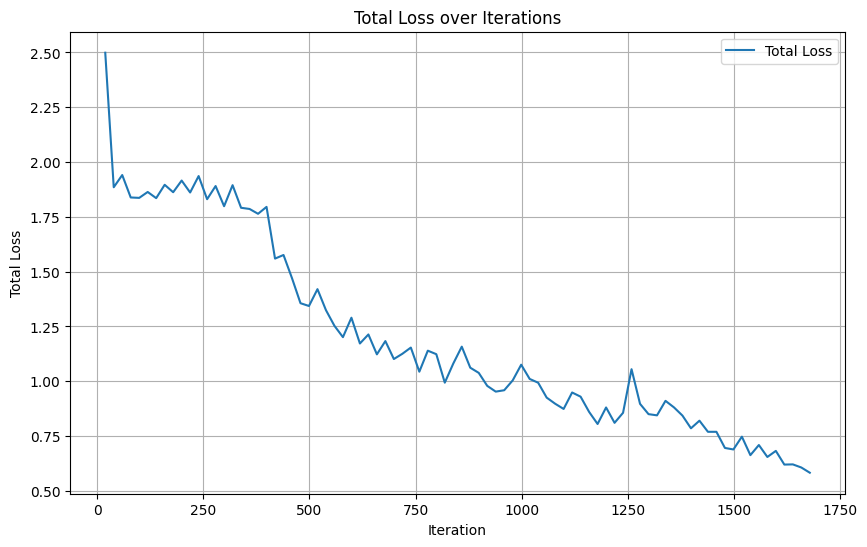

In [ ]:
import json
import matplotlib.pyplot as plt

# Tentukan path ke file metrics.json
metrics_file = '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/metrics.json'  # Ganti dengan path file Anda

# Menyaring data untuk total_loss
iterations = []
total_loss = []

# Membaca file JSON baris per baris
with open(metrics_file, 'r') as f:
    for line in f:
        # Memuat setiap baris JSON
        entry = json.loads(line)

        # Menyaring data untuk iteration dan total_loss
        if 'iteration' in entry and 'total_loss' in entry:
            iterations.append(entry['iteration'])
            total_loss.append(entry['total_loss'])

# Membuat grafik untuk total loss
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_loss, label="Total Loss", color='tab:blue')

# Menambahkan judul dan label sumbu
plt.title('Total Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Total Loss')
plt.grid(True)

# Menampilkan grafik
plt.legend()
plt.show()

**Grafik Average Precision**

Total data points: 4


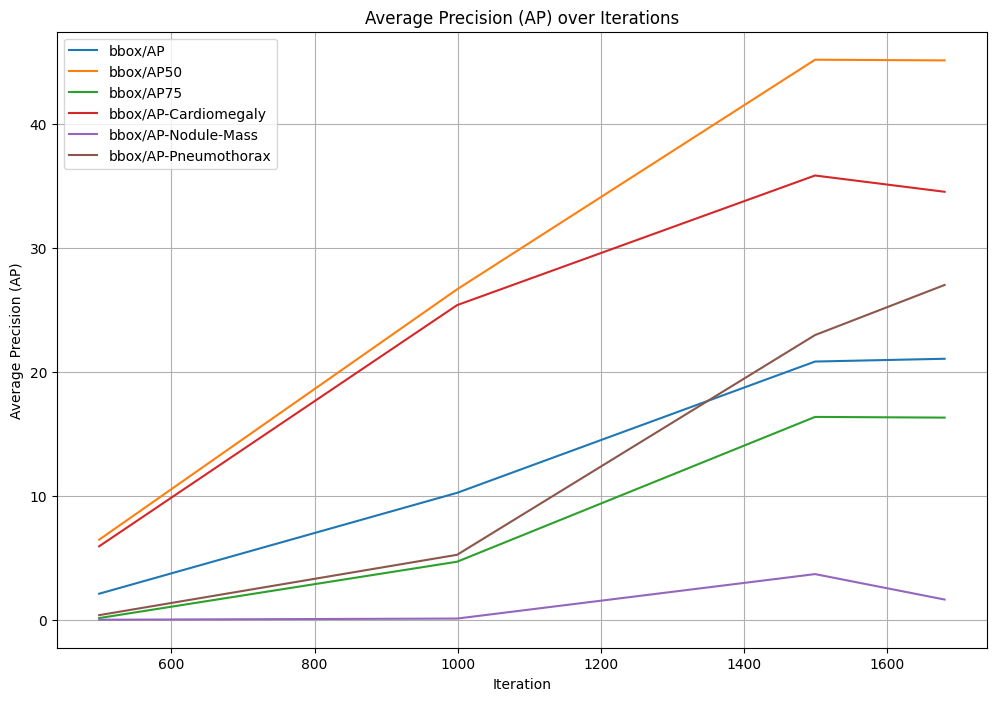

In [ ]:
import json
import matplotlib.pyplot as plt

# Tentukan path ke file metrics.json
metrics_file = '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/metrics.json'  # Ganti dengan path file Anda

# Menyaring data untuk AP
iterations = []
bbox_ap = []
bbox_ap50 = []
bbox_ap75 = []
bbox_ap_cardio = []
bbox_ap_nodule = []
bbox_ap_pneumo = []

# Membaca file JSON baris per baris
with open(metrics_file, 'r') as f:
    for line in f:
        try:
            entry = json.loads(line)

            # Pastikan hanya memasukkan data yang mengandung metrik 'bbox/AP'
            if 'bbox/AP' in entry:
                iterations.append(entry['iteration'])
                bbox_ap.append(entry['bbox/AP'])
                bbox_ap50.append(entry.get('bbox/AP50', None))
                bbox_ap75.append(entry.get('bbox/AP75', None))
                bbox_ap_cardio.append(entry.get('bbox/AP-Cardiomegaly', None))
                bbox_ap_nodule.append(entry.get('bbox/AP-Nodule-Mass', None))
                bbox_ap_pneumo.append(entry.get('bbox/AP-Pneumothorax', None))

        except json.JSONDecodeError as e:
            print(f"Error parsing line: {e}")
            continue

# Memastikan ada data untuk plotting
print(f"Total data points: {len(iterations)}")

# Jika ada data untuk plotting, buat grafik
if iterations:
    plt.figure(figsize=(12, 8))

    # Plotting berbagai metrik AP
    plt.plot(iterations, bbox_ap, label="bbox/AP", color='tab:blue')
    plt.plot(iterations, bbox_ap50, label="bbox/AP50", color='tab:orange')
    plt.plot(iterations, bbox_ap75, label="bbox/AP75", color='tab:green')
    plt.plot(iterations, bbox_ap_cardio, label="bbox/AP-Cardiomegaly", color='tab:red')
    plt.plot(iterations, bbox_ap_nodule, label="bbox/AP-Nodule-Mass", color='tab:purple')
    plt.plot(iterations, bbox_ap_pneumo, label="bbox/AP-Pneumothorax", color='tab:brown')

    # Menambahkan judul dan label sumbu
    plt.title('Average Precision (AP) over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Average Precision (AP)')
    plt.grid(True)

    # Menampilkan legenda
    plt.legend()

    # Menampilkan grafik
    plt.show()
else:
    print("Tidak ada data untuk plot.")


**mAP (Mean Average Precision)**

In [ ]:
import json

# Menentukan path file metrics.json di Google Drive
file_path = '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/metrics.json'

# Memuat file metrics.json
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file.readlines()]

# Menyaring nilai AP per kelas dari data terakhir
metrics = data[-1]  # Mengambil data terakhir yang berisi AP

# Mengambil nilai AP per kelas
ap_values = {
    "Cardiomegaly": metrics.get('bbox/AP-Cardiomegaly', 0),
    "Nodule-Mass": metrics.get('bbox/AP-Nodule-Mass', 0),
    "Pneumothorax": metrics.get('bbox/AP-Pneumothorax', 0),
}

# Menghitung mAP (mean Average Precision)
ap_values_list = list(ap_values.values())
map_score = sum(ap_values_list) / len(ap_values_list)

# Menampilkan hasil
print("AP per kelas:")
for class_name, ap in ap_values.items():
    print(f"{class_name}: {ap:.4f}")

print(f"\nmAP: {map_score:.4f}")


AP per kelas:
Cardiomegaly: 34.5279
Nodule-Mass: 1.6376
Pneumothorax: 27.0125

mAP: 21.0593


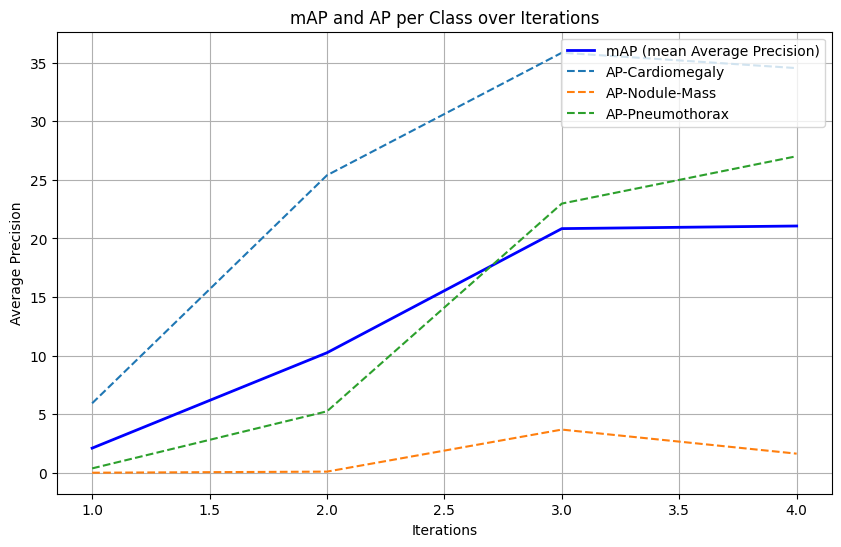

In [ ]:
import json
import matplotlib.pyplot as plt

# Menentukan path file metrics.json (update dengan path yang sesuai)
file_path = '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/metrics.json'

# Memuat file metrics.json
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file.readlines()]

# Menyaring nilai AP per kelas dari data terakhir
ap_per_iteration = []
map_per_iteration = []

# Menyaring nilai AP per kelas dan mAP dari setiap iterasi
for metrics in data:
    # Mengecek apakah nilai AP ada dalam data
    if 'bbox/AP-Cardiomegaly' in metrics and 'bbox/AP-Nodule-Mass' in metrics and 'bbox/AP-Pneumothorax' in metrics:
        ap_values = {
            "Cardiomegaly": metrics.get('bbox/AP-Cardiomegaly', 0),
            "Nodule-Mass": metrics.get('bbox/AP-Nodule-Mass', 0),
            "Pneumothorax": metrics.get('bbox/AP-Pneumothorax', 0),
        }

        # Menghitung mAP (mean Average Precision)
        ap_values_list = list(ap_values.values())
        map_score = sum(ap_values_list) / len(ap_values_list)

        ap_per_iteration.append(ap_values)
        map_per_iteration.append(map_score)

# Menyiapkan data untuk grafik
iterations = range(1, len(map_per_iteration) + 1)

# Plotting mAP per iterasi
plt.figure(figsize=(10, 6))
plt.plot(iterations, map_per_iteration, label='mAP (mean Average Precision)', color='blue', linewidth=2)

# Menambahkan grafik untuk setiap kelas
for class_name in ap_per_iteration[0].keys():
    class_ap_values = [ap[class_name] for ap in ap_per_iteration]
    plt.plot(iterations, class_ap_values, label=f'AP-{class_name}', linestyle='--')

# Menambahkan label dan judul
plt.xlabel('Iterations')
plt.ylabel('Average Precision')
plt.title('mAP and AP per Class over Iterations')
plt.legend(loc='upper right')

# Menampilkan grafik
plt.grid(True)
plt.show()


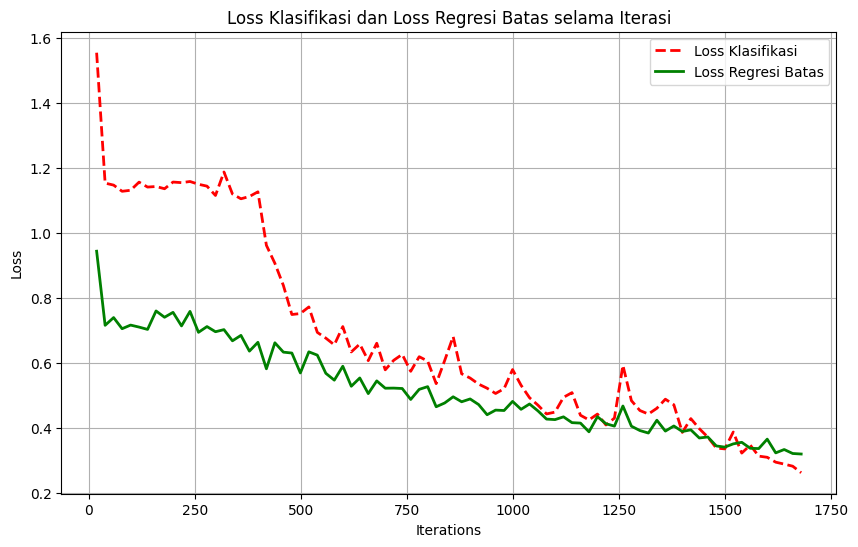

In [ ]:
import matplotlib.pyplot as plt
import json

# Path file di Google Drive (sesuaikan dengan path file Anda)
file_path = '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/metrics.json'

# Memuat data dari file metrics.json
with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

# Menyiapkan data untuk plot
iterations = []
loss_cls_values = []
loss_box_reg_values = []

# Looping untuk mengekstrak data
for metrics in data:
    # Pastikan ada key yang dibutuhkan
    if 'iteration' in metrics:
        iterations.append(metrics['iteration'])
    if 'loss_cls' in metrics:
        loss_cls_values.append(metrics['loss_cls'])
    if 'loss_box_reg' in metrics:
        loss_box_reg_values.append(metrics['loss_box_reg'])

# Pastikan panjang data sama, dan jika tidak, sesuaikan panjangnya
min_len = min(len(iterations), len(loss_cls_values), len(loss_box_reg_values))

# Potong data agar memiliki panjang yang sama
iterations = iterations[:min_len]
loss_cls_values = loss_cls_values[:min_len]
loss_box_reg_values = loss_box_reg_values[:min_len]

# Membuat plot jika data ada
if iterations and loss_cls_values and loss_box_reg_values:
    plt.figure(figsize=(10, 6))

    # Plot Loss Klasifikasi
    plt.plot(iterations, loss_cls_values, label='Loss Klasifikasi', color='red', linestyle='--', linewidth=2)

    # Plot Loss Regresi Batas
    plt.plot(iterations, loss_box_reg_values, label='Loss Regresi Batas', color='green', linestyle='-', linewidth=2)

    # Menambahkan label dan judul
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss Klasifikasi dan Loss Regresi Batas selama Iterasi')

    # Menambahkan legend
    plt.legend(loc='upper right')

    # Menampilkan grid
    plt.grid(True)

    # Menampilkan grafik
    plt.show()
else:
    print("Data tidak lengkap, pastikan key 'loss_cls' dan 'loss_box_reg' ada dalam setiap entri.")


# **Confusion Matrix**

In [ ]:
def calculate_iou(box1, box2):
    """
    box: [xmin, ymin, xmax, ymax]
    """
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area

    if union_area == 0:
        return 0
    else:
        return inter_area / union_area


Processing Test Images: 100%|██████████| 111/111 [00:09<00:00, 11.15it/s]


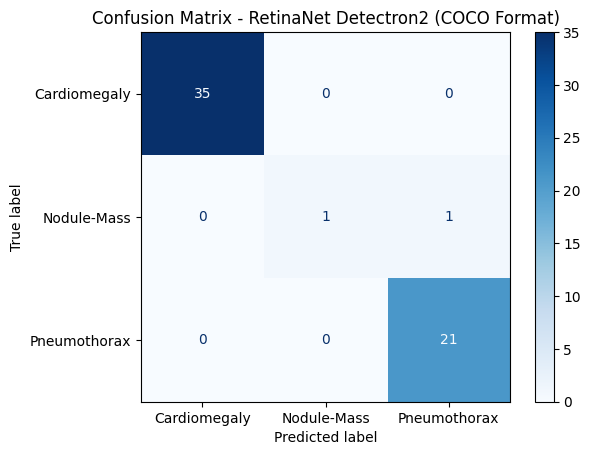

In [ ]:
import os
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 🧠 Load model
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "best_model.pth")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/best_model.pth"
predictor = DefaultPredictor(cfg)

# 📚 Prepare dataset paths
test_image_dir = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/test"
coco_annotation_path = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/test/_annotations.coco.json"

# Load COCO ground truth
with open(coco_annotation_path) as f:
    coco_data = json.load(f)

# Build image_id to filename mapping
id_to_filename = {img['id']: img['file_name'] for img in coco_data['images']}

# Build annotations mapping
annotations = coco_data['annotations']
gt_dict = {}  # {filename: (boxes, labels)}

for ann in annotations:
    image_id = ann['image_id']
    filename = id_to_filename[image_id]
    bbox = ann['bbox']  # [x, y, width, height]
    category_id = ann['category_id']

    if filename not in gt_dict:
        gt_dict[filename] = {'boxes': [], 'labels': []}

    # Convert bbox format to [xmin, ymin, xmax, ymax]
    xmin, ymin, w, h = bbox
    xmax = xmin + w
    ymax = ymin + h

    gt_dict[filename]['boxes'].append([xmin, ymin, xmax, ymax])
    gt_dict[filename]['labels'].append(category_id)

# Build category_id to class_name mapping
category_id_to_name = {cat['id']: cat['name'] for cat in coco_data['categories']}
class_names = [category_id_to_name[i] for i in sorted(category_id_to_name.keys())]

# 🔥 Start evaluating
y_true = []
y_pred = []
iou_threshold = 0.5
confidence_threshold = 0.5

test_images = sorted(os.listdir(test_image_dir))
test_images = [img for img in test_images if img.endswith('.jpg') or img.endswith('.png')]

for img_file in tqdm(test_images, desc="Processing Test Images"):
    # Read image
    img_path = os.path.join(test_image_dir, img_file)
    img = cv2.imread(img_path)

    if img_file not in gt_dict:
        continue  # skip images without ground truth

    gt_boxes = np.array(gt_dict[img_file]['boxes'])
    gt_classes = np.array(gt_dict[img_file]['labels'])

    # Predict
    outputs = predictor(img)
    instances = outputs["instances"].to("cpu")

    pred_boxes = instances.pred_boxes.tensor.numpy()
    pred_classes = instances.pred_classes.numpy()
    pred_scores = instances.scores.numpy()

    # Filter predictions by confidence
    keep = pred_scores > confidence_threshold
    pred_boxes = pred_boxes[keep]
    pred_classes = pred_classes[keep]

    matched_gt = set()

    # Matching predicted boxes to ground truth boxes
    for pred_box, pred_class in zip(pred_boxes, pred_classes):
        best_iou = 0
        best_idx = -1
        for idx, gt_box in enumerate(gt_boxes):
            iou = calculate_iou(pred_box, gt_box)
            if iou > best_iou and idx not in matched_gt:
                best_iou = iou
                best_idx = idx
        if best_iou >= iou_threshold and best_idx != -1:
            y_true.append(gt_classes[best_idx])
            y_pred.append(pred_class)
            matched_gt.add(best_idx)
        else:
            # False positive
            y_true.append(-1)  # background
            y_pred.append(pred_class)

    # False negatives
    for idx, gt_class in enumerate(gt_classes):
        if idx not in matched_gt:
            y_true.append(gt_class)
            y_pred.append(-1)

# 🔥 Build Confusion Matrix
all_labels = sorted(list(set([lab for lab in y_true if lab != -1] + [lab for lab in y_pred if lab != -1])))
cm = confusion_matrix(y_true, y_pred, labels=all_labels)

class_labels = [category_id_to_name[i] for i in all_labels]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - RetinaNet Detectron2 (COCO Format)")
plt.show()


In [ ]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Set folder paths
test_data_path = '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new/test'  # Folder gambar test
output_folder = '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/output/SGD_30_1e-3_0.5'  # Folder output untuk hasil prediksi

# Pastikan folder output ada
os.makedirs(output_folder, exist_ok=True)

# 🧠 Load the trained model
cfg = get_cfg()
cfg.merge_from_file('/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/epoch_30_1e-3_SGD/config.yaml')  # Ganti dengan path ke file konfigurasi model Anda
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "best_model.pth")  # Path ke model .pth yang sudah dilatih

# Initialize the predictor
predictor = DefaultPredictor(cfg)

# Fungsi untuk melakukan prediksi dan menyimpan gambar
def predict_and_save_images(test_data_path, predictor, output_folder, confidence_threshold=0.2):
    image_paths = [os.path.join(test_data_path, f) for f in os.listdir(test_data_path) if f.endswith('.jpg') or f.endswith('.png')]

    for img_path in image_paths:
        # 📸 Read the image
        im = cv2.imread(img_path)

        # 🧠 Run inference
        outputs = predictor(im)

        # Filter instances with confidence
        instances = outputs["instances"]
        scores = instances.scores
        filtered_instances = instances[scores > confidence_threshold]

        # 🖼️ Visualize the results
        v = Visualizer(im[:, :, ::-1], MetadataCatalog.get("roboflow_train"), scale=1)
        v = v.draw_instance_predictions(filtered_instances.to("cpu"))

        # Ambil nama file dan buat path untuk menyimpan gambar hasil prediksi
        filename = os.path.basename(img_path)
        output_path = os.path.join(output_folder, f"pred_{filename}")

        # Simpan gambar hasil prediksi
        cv2.imwrite(output_path, v.get_image()[:, :, ::-1])  # Convert kembali ke BGR untuk OpenCV
        print(f"Saved predicted image: {output_path}")

# Menjalankan prediksi dan menyimpan hasilnya
predict_and_save_images(test_data_path, predictor, output_folder, confidence_threshold=0.5)


[05/22 05:29:54 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/epoch_30_1e-3_SGD/best_model.pth ...
Saved predicted image: /content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/output/SGD_30_1e-3_0.5/pred_b0a52e18d443efb28d082f0ae8e7b893_jpg.rf.f308729e5d7b3ef41a337bd7410a984a.jpg
Saved predicted image: /content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/output/SGD_30_1e-3_0.5/pred_a673c55470f775d286249e189896c376_jpg.rf.2d88ff7e87d2b8d90cdd7cce24e679c7.jpg
Saved predicted image: /content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/output/SGD_30_1e-3_0.5/pred_eb6c714df22142229464c6b83e47d7d6_jpg.rf.04bfd665c79c815fe0bd100093169f36.jpg
Saved predicted image: /content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/output/SGD_30_1e-3_0.5/pred_b66d58ed04096cca4e4fbb0da6e74592_jpg.rf.6dfbf56819816e73bb56e25f2a2d6583.jpg
Saved predicted image: /content/drive/MyDrive

# **Evaluasi Data Train, Validation, dan Testing**

In [ ]:
# 📦 Install dependencies
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install -q pycocotools

import torch
import cv2
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.checkpoint import DetectionCheckpointer

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-y05_3d7p
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-y05_3d7p
  Resolved https://github.com/facebookresearch/detectron2.git to commit 65184fc057d4fab080a98564f6b60fae0b94edc4
  Preparing metadata (setup.py) ... done
  Using cached yacs-0.1.8-py3-none-any.whl.metadata (639 bytes)
  Using cached fvcore-0.1.5.post20221221.tar.gz (50 kB)
  Preparing metadata (setup.py) ... done
  Using cached iopath-0.1.9-py3-none-any.whl.metadata (370 bytes)
  Using cached hydra_core-1.3.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached black-25.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (81 kB)
  Using cached portalocker-3.1.1-py3-none-any.whl.metadata (8.6 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached pathspec-0.12.1-py3-none-any.whl.metadata (21

In [ ]:
import os
from detectron2.data.datasets import register_coco_instances

# Set root folder di Google Drive
dataset_root = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/dataset_new"

# Buat path lengkap ke JSON dan folder gambar
train_json = os.path.join(dataset_root, "train/_annotations.coco.json")
val_json = os.path.join(dataset_root, "valid/_annotations.coco.json")
test_json = os.path.join(dataset_root, "test/_annotations.coco.json")
train_img_dir = os.path.join(dataset_root, "train")
val_img_dir = os.path.join(dataset_root, "valid")
test_img_dir = os.path.join(dataset_root, "test")

# ✅ Cek apakah file dan folder ada
print("Train JSON exists:", os.path.exists(train_json))
print("Train Image Dir exists:", os.path.exists(train_img_dir))

# 🗂 Daftarkan dataset ke Detectron2
register_coco_instances("roboflow_train_2", {}, train_json, train_img_dir)
register_coco_instances("roboflow_val_2", {}, val_json, val_img_dir)
register_coco_instances("roboflow_test_2", {}, val_json, val_img_dir)

Train JSON exists: True
Train Image Dir exists: True


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.modeling import build_model

# Load config dan model
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/config.yaml")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/best_model.pth"
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = 'cuda'
cfg.DATASETS.TEST = ("roboflow_train",)  # ✅ Kompatibilitas evaluasi

# Evaluasi pada training set
evaluator = COCOEvaluator("roboflow_train", cfg, False, output_dir="/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/new/record_train")
val_loader = build_detection_test_loader(cfg, "roboflow_train")

print("Evaluating on Training Set...")
model = build_model(cfg)
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)
results = inference_on_dataset(model, val_loader, evaluator)

print("Evaluation Results:", results)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Evaluating on Training Set...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.311
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.634
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.255
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.342
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.414
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.383
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.391
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.391
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.409
 Average 

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.modeling import build_model

# Load config dan model
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/config.yaml")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/best_model.pth"
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = 'cuda'
cfg.DATASETS.TEST = ("roboflow_val",)  # ✅ Kompatibilitas evaluasi

# Evaluasi pada training set
evaluator = COCOEvaluator("roboflow_val", cfg, False, output_dir="/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/new/record_val")
val_loader = build_detection_test_loader(cfg, "roboflow_val")

print("Evaluating on Valid Set...")
model = build_model(cfg)
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)
results = inference_on_dataset(model, val_loader, evaluator)

print("Evaluation Results:", results)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Evaluating on Valid Set...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.193
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.408
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.135
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.203
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.263
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.271
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.271
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.174
 Average Rec

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer


# Load config dan model
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/config.yaml")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/best_model.pth"
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = 'cuda'
cfg.DATASETS.TEST = ("roboflow_test",)  # ✅ Kompatibilitas evaluasi

# Evaluasi pada training set
evaluator = COCOEvaluator("roboflow_test", cfg, False, output_dir="/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/new/record_test")
val_loader = build_detection_test_loader(cfg, "roboflow_test")

print("Evaluating on Test Set...")
model = build_model(cfg)
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)
results = inference_on_dataset(model, val_loader, evaluator)

print("Evaluation Results:", results)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Evaluating on Test Set...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.450
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.326
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.263
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.284
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.284
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.327
 Average Reca

In [ ]:
from detectron2.evaluation.evaluator import DatasetEvaluator
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

class PRF1Evaluator(DatasetEvaluator):
    def __init__(self, dataset_name, metadata=None, class_names=None):
        from detectron2.data import MetadataCatalog, DatasetCatalog
        self.metadata = MetadataCatalog.get(dataset_name)
        self.dataset_dicts = DatasetCatalog.get(dataset_name)
        self.class_names = class_names if class_names else self.metadata.thing_classes
        self.gts = []
        self.preds = []

        # Buat mapping image_id ke daftar ground truth class ID
        self.imgid_to_gt = {}
        for data in self.dataset_dicts:
            gt_classes = [ann["category_id"] for ann in data["annotations"]]
            self.imgid_to_gt[data["image_id"]] = gt_classes

    def reset(self):
        self.gts = []
        self.preds = []

    def process(self, inputs, outputs):
        for input, output in zip(inputs, outputs):
            img_id = input["image_id"]
            gt_classes = self.imgid_to_gt.get(img_id, [])
            pred_classes = output["instances"].pred_classes.cpu().numpy() if len(output["instances"]) > 0 else []

            # Samakan panjang dulu
            if len(pred_classes) < len(gt_classes):
                pred_classes = list(pred_classes) + [-1] * (len(gt_classes) - len(pred_classes))
            elif len(pred_classes) > len(gt_classes):
                pred_classes = pred_classes[:len(gt_classes)]

            # Buang id 0 dan negatif setelah disamakan panjang
            filtered = [
                (g, p) for g, p in zip(gt_classes, pred_classes)
                if g > 0 and p > 0
            ]

            if filtered:
                g_filtered, p_filtered = zip(*filtered)
                self.gts.extend(g_filtered)
                self.preds.extend(p_filtered)

    def evaluate(self):
        print("\n==== Precision, Recall, and F1-Score per Class ====\n")

        if not self.gts or not self.preds:
            print("⚠️ Tidak ada ground truth atau prediksi yang valid untuk dievaluasi.")
            return {}

        # Shift kelas supaya cocok dengan sklearn (label 1–3 → index 0–2)
        y_true = [y - 1 for y in self.gts]
        y_pred = [y - 1 for y in self.preds]

        # Hitung classification report
        report_dict = classification_report(
            y_true,
            y_pred,
            target_names=self.class_names,
            output_dict=True,
            digits=3,
            zero_division=0
        )

        # Konversi ke DataFrame
        df = pd.DataFrame(report_dict).transpose()
        df.index.name = 'Class'

        # Ambil dan hapus akurasi dari df
        accuracy = report_dict.get("accuracy", None)
        if "accuracy" in df.index:
            df.drop("accuracy", inplace=True)

        # Ubah support ke integer
        if 'support' in df.columns:
            df['support'] = df['support'].astype(int)

        # Urutkan kolom
        df = df[['precision', 'recall', 'f1-score', 'support']]

        # Cetak hasil
        print(df.to_string(float_format="%.3f"))
        if accuracy is not None:
            print(f"\nOverall Accuracy: {accuracy:.3f}")

        # Return dict untuk logging atau visualisasi
        return {
            "accuracy": accuracy,
            "classification_report": df
        }


In [ ]:
# Setup config
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/config.yaml")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/best_model.pth"
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = 'cuda'
cfg.DATASETS.TEST = ("roboflow_train",)

class_names = ["Cardiomegaly", "Nodule/Mass", "Pneumothorax"]

evaluator = PRF1Evaluator(
    "roboflow_train",
    class_names=class_names
)

test_loader = build_detection_test_loader(cfg, "roboflow_train")
inference_on_dataset(model, test_loader, evaluator)



Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.




==== Precision, Recall, and F1-Score per Class ====

              precision  recall  f1-score  support
Class                                             
Cardiomegaly      0.702   0.997     0.824      310
Nodule/Mass       1.000   0.312     0.476      189
Pneumothorax      0.959   0.959     0.959      244
macro avg         0.887   0.756     0.753      743
weighted avg      0.862   0.810     0.780      743

Overall Accuracy: 0.810


{'accuracy': 0.8102288021534321,
 'classification_report':               precision    recall  f1-score  support
 Class                                               
 Cardiomegaly   0.702273  0.996774  0.824000      310
 Nodule/Mass    1.000000  0.312169  0.475806      189
 Pneumothorax   0.959016  0.959016  0.959016      244
 macro avg      0.887096  0.755987  0.752941      743
 weighted avg   0.862321  0.810229  0.779768      743}

In [ ]:
# Setup config
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/config.yaml")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/best_model.pth"
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = 'cuda'
cfg.DATASETS.TEST = ("roboflow_val",)

class_names = ["Cardiomegaly", "Nodule/Mass", "Pneumothorax"]

evaluator = PRF1Evaluator(
    "roboflow_val",
    class_names=class_names
)

test_loader = build_detection_test_loader(cfg, "roboflow_val")
inference_on_dataset(model, test_loader, evaluator)



Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.




==== Precision, Recall, and F1-Score per Class ====

              precision  recall  f1-score  support
Class                                             
Cardiomegaly      0.610   0.962     0.746       26
Nodule/Mass       1.000   0.083     0.154       12
Pneumothorax      0.957   0.882     0.918       51
macro avg         0.856   0.642     0.606       89
weighted avg      0.862   0.798     0.765       89

Overall Accuracy: 0.798


{'accuracy': 0.797752808988764,
 'classification_report':               precision    recall  f1-score  support
 Class                                               
 Cardiomegaly   0.609756  0.961538  0.746269       26
 Nodule/Mass    1.000000  0.083333  0.153846       12
 Pneumothorax   0.957447  0.882353  0.918367       51
 macro avg      0.855734  0.642408  0.606161       89
 weighted avg   0.861612  0.797753  0.765010       89}

In [ ]:
# Setup config
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/config.yaml")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/new/epoch_30_1e-3_SGD/best_model.pth"
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = 'cuda'
cfg.DATASETS.TEST = ("roboflow_test",)

class_names = ["Cardiomegaly", "Nodule/Mass", "Pneumothorax"]

evaluator = PRF1Evaluator(
    "roboflow_test",
    class_names=class_names
)

test_loader = build_detection_test_loader(cfg, "roboflow_test")
inference_on_dataset(model, test_loader, evaluator)



Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.




==== Precision, Recall, and F1-Score per Class ====

              precision  recall  f1-score  support
Class                                             
Cardiomegaly      0.729   0.972     0.833       36
Nodule/Mass       1.000   0.067     0.125       15
Pneumothorax      0.806   0.862     0.833       29
macro avg         0.845   0.634     0.597       80
weighted avg      0.808   0.762     0.701       80

Overall Accuracy: 0.762


{'accuracy': 0.7625,
 'classification_report':               precision    recall  f1-score  support
 Class                                               
 Cardiomegaly   0.729167  0.972222  0.833333       36
 Nodule/Mass    1.000000  0.066667  0.125000       15
 Pneumothorax   0.806452  0.862069  0.833333       29
 macro avg      0.845206  0.633653  0.597222       80
 weighted avg   0.807964  0.762500  0.700521       80}

# Inference ketika tidak training data

In [ ]:
from google.colab import files
print("masukkan file model_final.pth, gambar dan config.yaml")
uploaded = files.upload()

masukkan file model_final.pth, gambar dan config.yaml


Saving model_final.pth to model_final.pth


In [ ]:
# 📦 Install dependencies
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install -q pycocotools

import torch
import cv2
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.checkpoint import DetectionCheckpointer

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-y_93hqps
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-y_93hqps
  Resolved https://github.com/facebookresearch/detectron2.git to commit 536dc9d527074e3b15df5f6677ffe1f4e104a4ab
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311-cp311-linux_x86_64.whl size=6436872 sha256=6dc3813fb6d65eabe0b14a94eda90033a5e5d36089c4148b6e4d06f0a7184711
  Stored in directory: /tmp/pip-ephem-wheel-cache-fkpmnl21/wheels/17/d9/40/60db98e485aa9455d

Instances(num_instances=7, image_height=3520, image_width=3520, fields=[pred_boxes: Boxes(tensor([[ 309.7257, 2047.0334,  402.6324, 2127.9202],
        [1000.1959, 2245.9644, 2483.4290, 2791.5959],
        [ 292.9893, 2059.2458,  362.6981, 2123.7927],
        [ 797.0043,  379.3314, 1491.6006, 1032.9591],
        [ 315.3261, 2019.5217,  408.3491, 2099.7021],
        [3299.1980,   66.2097, 3323.1223,   86.7350],
        [3280.3555,   67.8643, 3304.3176,   87.4957]], device='cuda:0')), scores: tensor([0.3096, 0.2889, 0.2329, 0.2175, 0.2141, 0.2038, 0.2029],
       device='cuda:0'), pred_classes: tensor([2, 1, 2, 2, 2, 2, 2], device='cuda:0')])


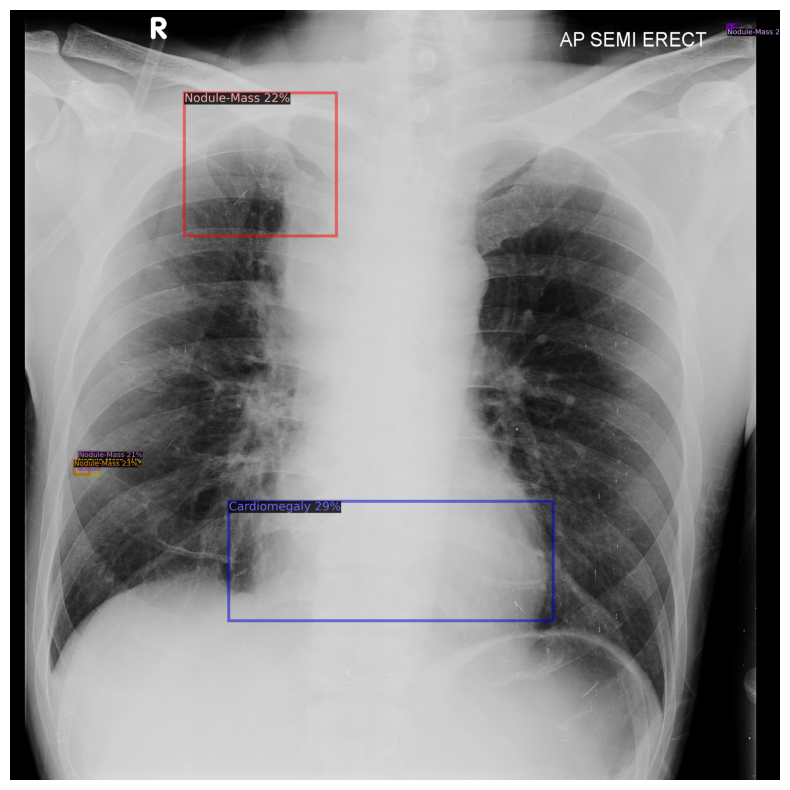

Detected 7 objects with confidence > 20.0%


In [ ]:
# 💡 Load the config file (you still need this to define model structure)
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/epoch_50_1e-3_SGD/config.yaml")
#cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set score threshold

# 🔍 Set path to best model
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/epoch_50_1e-3_SGD/best_model.pth"

# 🔧 Build model manually (optional alternative to DefaultPredictor if you want more control)
predictor = DefaultPredictor(cfg)

# 🖼️ Load and run inference on an image
image_path = '/content/drive/MyDrive/DATA_RSUA/images/0124AE1386AN.bmp'
im = cv2.imread(image_path)

outputs = predictor(im)

# Filter instances with confidence
confidence = 0.2
instances = outputs["instances"]
scores = instances.scores
filtered_instances = instances[scores > confidence]
print(filtered_instances)


# 🎨 Visualize
MetadataCatalog.get("roboflow_train").thing_classes = ["objects", "Cardiomegaly", "Nodule-Mass", "Pneumothorax"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get("roboflow_train"), scale=1)
v = v.draw_instance_predictions(filtered_instances.to("cpu"))

plt.figure(figsize=(10, 10))
plt.imshow(v.get_image())
plt.axis("off")
plt.show()

print(f"Detected {len(filtered_instances)} objects with confidence > {confidence*100}%")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Ground truth untuk gambar ini tidak ditemukan.


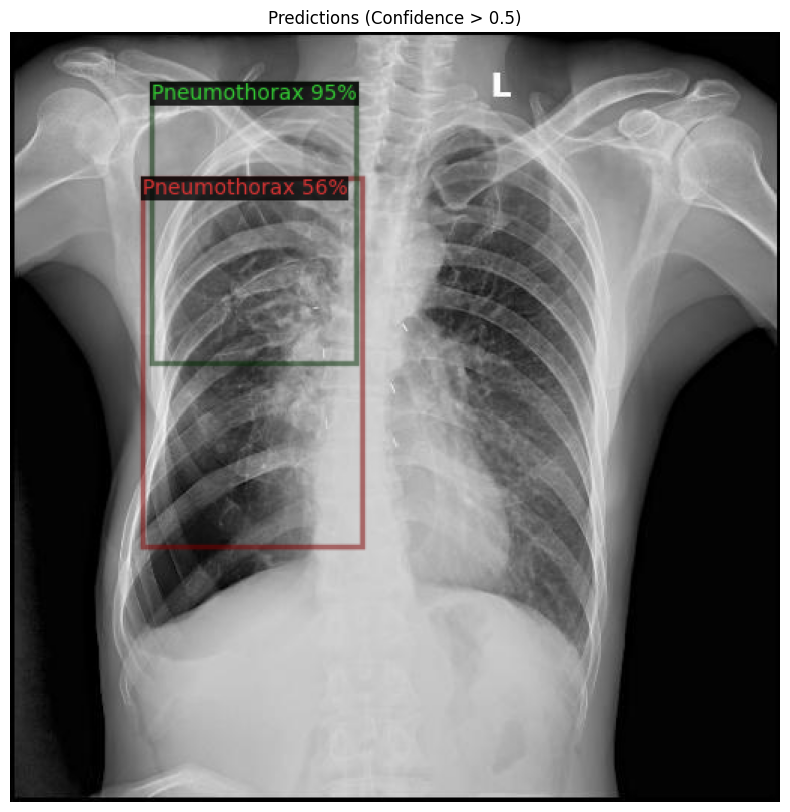

Detected 2 objects with confidence > 50.0%


In [ ]:
import cv2
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# 💡 Load config
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/epoch_50_1e-3_SGD/config.yaml")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Model/epoch_50_1e-3_SGD/best_model.pth"

# 🔍 Buat predictor
predictor = DefaultPredictor(cfg)

# 🖼️ Gambar yang akan diuji
image_path = '/content/drive/MyDrive/210411100014_Taufiqu Reza Yoga Pratama/Dataset/test/a537060564b5e08c80f46362deb565e8_jpg.rf.de1b7f2a49b58f92cd288cbbb9310ecf.jpg'
im = cv2.imread(image_path)

# 🔮 Prediksi
outputs = predictor(im)

# 🔎 Filter prediksi berdasarkan confidence threshold
confidence = 0.5
instances = outputs["instances"]
scores = instances.scores
filtered_instances = instances[scores > confidence]

# 🎨 Visualisasi prediksi
MetadataCatalog.get("roboflow_train").thing_classes = ["objects", "Cardiomegaly", "Nodule-Mass", "Pneumothorax"]
metadata = MetadataCatalog.get("roboflow_train")

v_pred = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1)
v_pred = v_pred.draw_instance_predictions(filtered_instances.to("cpu"))
img_pred = v_pred.get_image()

# ✅ Cari ground truth dari dataset
dataset_dicts = DatasetCatalog.get("roboflow_test")
ground_truth = None
for d in dataset_dicts:
    if image_path in d["file_name"]:  # atau gunakan os.path.basename
        ground_truth = d
        break

# 🎨 Visualisasi ground truth
if ground_truth:
    v_gt = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1)
    v_gt = v_gt.draw_dataset_dict(ground_truth)
    img_gt = v_gt.get_image()

    # 🔄 Tampilkan berdampingan
    fig, ax = plt.subplots(1, 2, figsize=(18, 10))
    ax[0].imshow(img_gt)
    ax[0].set_title("Ground Truth")
    ax[0].axis("off")

    ax[1].imshow(img_pred)
    ax[1].set_title(f"Predictions (Confidence > {confidence})")
    ax[1].axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("Ground truth untuk gambar ini tidak ditemukan.")
    # Tampilkan hanya prediksi
    plt.figure(figsize=(10, 10))
    plt.imshow(img_pred)
    plt.axis("off")
    plt.title(f"Predictions (Confidence > {confidence})")
    plt.show()

print(f"Detected {len(filtered_instances)} objects with confidence > {confidence*100}%")
